# **0. Introduction - NCAA Basketball Tournament Forecasting Project**

**Project Objective:**

Forecasting the results of the 2024 collegiate basketball tournament using historical data by presenting a portfolio of brackets for both the men's and women's divisions.

**What is NCAA?**

The National Collegiate Athletic Association(NCAA) is the American organization in charge of overseeing college athletics. It hosts a variety of sporting events, such as the eagerly awaited collegiate basketball competitions for both sexes. Sports lovers and aficionados follow these tournaments closely as they feature elite college teams competing for championship crowns.

**What is March Madness?**

"March Madness" refers to the annual NCAA Basketball Tournament, a single-elimination college basketball competition that takes place in the United States. The tournament typically occurs in March and April, involving 68 college basketball teams from the Division I level of the National Collegiate Athletic Association (NCAA). The competition culminates with the crowning of the national champion.




![](https://www.ncaa.com/_flysystem/public-s3/images/2024/01/10/2024-ncaa-tournament-bracket-march-madness.jpg)

**Schedule**

2024 NCAA men's basketball tournament for March Madness: 
* Selection Sunday: Sunday, March 17
* First Four: March 19-20
* First round: March 21-22
* Second round: March 23-24 
* Sweet 16: March 28-29 
* Elite Eight: March 30-31 
* Final Four: Saturday, April 6
* NCAA championship game: Monday, April 8


2024 NCAA women's basketball tournament for March Madness:
* Selection Sunday: 8 p.m. ET Sunday, March 17 on ESPN
* First Four: March 20-21
* First round: March 22-23
* Second round: March 24-25
* Sweet 16: March 29-30
* Elite Eight: March 31-April 1
* Final Four: Friday, April 5 at 7:30 and 9 p.m. ET on ESPN, hosted at Rocket Mortgage FieldHouse in Cleveland, Ohio. 
* NCAA championship game: Sunday, April 7 at 3 p.m. ET on ABC, hosted at Rocket Mortgage FieldHouse in Cleveland, Ohio.

# **1. Data Loading & Synopsis:**
**1.1 Data Loading**

In [9]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt


folder = 'data/'

In [10]:
# data Section -1 The Basics:
MTeams = pd.read_csv(folder+'MTeams.csv')
WTeams = pd.read_csv(folder+'WTeams.csv')
MSeasons = pd.read_csv(folder+'MSeasons.csv')
WSeasons = pd.read_csv(folder+'WSeasons.csv')
MNCAATourneySeeds = pd.read_csv(folder+'MNCAATourneySeeds.csv')
WNCAATourneySeeds = pd.read_csv(folder+'WNCAATourneySeeds.csv')

# data Section -2 Team Box Scores:
MRegualarSeasonCompactResults = pd.read_csv(folder+'MRegularSeasonCompactResults.csv')
WRegualrSeasonCompactResults = pd.read_csv(folder+'WRegularSeasonCompactResults.csv')

MNCAATourneyCompactResults = pd.read_csv(folder+'MNCAATourneyCompactResults.csv')
WNCAATourneyCompactResults = pd.read_csv(folder+'WNCAATourneyCompactResults.csv')

MRegularSeasonDetailedResults = pd.read_csv(folder+'MRegularSeasonDetailedResults.csv')
WRegularSeasonDetailedResults = pd.read_csv(folder+'WRegularSeasonDetailedResults.csv')

MNCAATourneyDetailedResults = pd.read_csv(folder+'MNCAATourneyDetailedResults.csv')
WNCAATourneyDetailedResults = pd.read_csv(folder+'WNCAATourneyDetailedResults.csv')

#Data Section -3 Geography:
Cities = pd.read_csv(folder+'Cities.csv')

MGAameCities = pd.read_csv(folder+'MGameCities.csv')
WGameCities = pd.read_csv(folder+'WGameCities.csv')

#Data Section -4 Public Rankings:
MMasseyOrdinals = pd.read_csv(folder+'MMasseyOrdinals.csv')

#Data Section -5 Supplements:
MTeamCoaches = pd.read_csv(folder+'MTeamCoaches.csv')

Conferences = pd.read_csv(folder+'Conferences.csv')

MTeamConferences = pd.read_csv(folder+'MTeamConferences.csv')
WTeamConferences = pd.read_csv(folder+'WTeamConferences.csv')

MConferenceTourneyGames = pd.read_csv(folder+'MConferenceTourneyGames.csv')

MSecondaryTourneyTeams = pd.read_csv(folder+'MSecondaryTourneyTeams.csv')

MSecondaryTourneyCompactResults = pd.read_csv(folder+'MSecondaryTourneyCompactResults.csv')

MTeamSpellings = pd.read_csv(folder+'MTeamSpellings.csv', encoding='latin1')
WTeamSpellings = pd.read_csv(folder+'WTeamSpellings.csv', encoding='latin1')

MCAATourneySlots = pd.read_csv(folder+'MNCAATourneySlots.csv')
WCAATourneySlots = pd.read_csv(folder+'WNCAATourneySlots.csv')

MCAATourneySeedRoundSlots = pd.read_csv(folder+'MNCAATourneySeedRoundSlots.csv')

# Data Section -6 Others:
# tourney_seeds_2024 = pd.read_csv(folder+'tourney_seeds_2024.csv')


sample_submission = pd.read_csv(folder+'SampleSubmissionStage1.csv')

**1.2 Data Synopsis**
> The dataset provided for the NCAA basketball tournament forecasting project includes extensive historical data about college basketball games and teams spanning several years. This data encompasses regular season games, conference tournaments, and the NCAA tournaments for both men and women.


**Sections 1: Basic Tournament Information**
> Contains essential details about tournament game results, team matchups, and scores.

**Sections 2: Detailed Tournament Results** 
> Provides in-depth statistics for each tournament game, offering insights into player performance.

**Sections 3: Team Seeds and Regions**
> Enlists team seeds and regions, crucial for understanding tournament brackets.

**Sections 4: Season Information**
> Contains details about each season, including the year and associated tournament.

**Sections 5: Supplementary Information**
* **Coaches Information**: Lists head coaches for each team in each season. Indicates the start and finish range of DayNum for mid-season coaching changes.
* **Conference Details**: Provides information about Division I conferences with abbreviations and longer names. <
* **Team Conference Affiliations**: Indicates team conference affiliations for each season.
* **Conference Tournament Games**: Identifies games in post-season men's conference tournaments.
* **Secondary Tournament Teams**: Lists teams participating in post-season men's tournaments other than the NCAA Tournament.
* **Secondary Tournament Results**: Indicates final scores for secondary post-season tournaments like NIT, CBI, CIT, V16, and TBC.
* **Alternative Team Spellings**: Provides alternative spellings of team names for matching with external data.
* **Tournament Slots and Pairings**: Identifies pairings and slots for each tournament game, essential for bracket structure.
* **Bracket Structure Information**: Represents men's bracket structure, mapping seeds to bracket slots for each game round.

# 2. **Exploratory Data Analysis (EDA):**

**2.1 FirstD1Season**

**Men**

In [11]:
tourney_seeds_2024_MTeam = tourney_seeds_2024[tourney_seeds_2024['Tournament'] == 'M']
tourney_seeds_2024_MTeam = pd.merge(tourney_seeds_2024_MTeam, MTeams, on='TeamID', how='left')
tourney_seeds_2024_MTeam.head()

NameError: name 'tourney_seeds_2024' is not defined

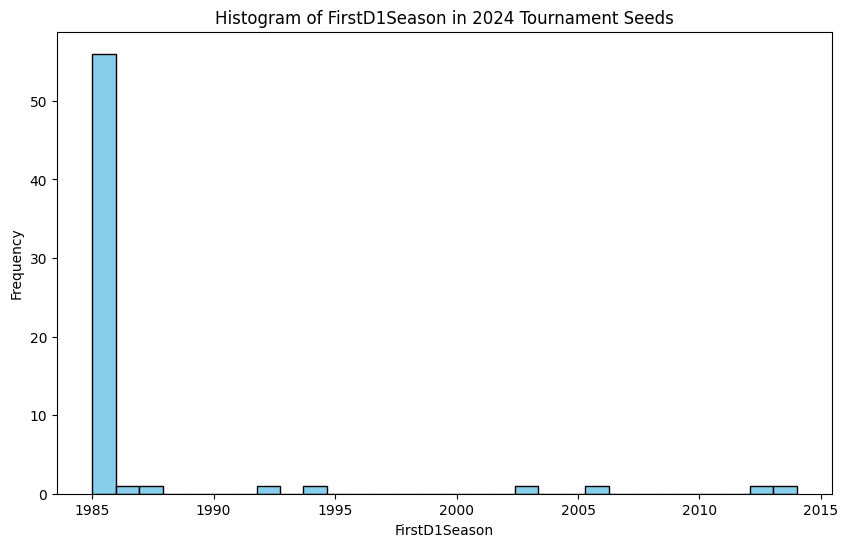

In [ ]:


# Create a histogram of FirstD1Season
plt.figure(figsize=(10, 6))
plt.hist(tourney_seeds_2024_MTeam['FirstD1Season'], bins=30, color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('FirstD1Season')
plt.ylabel('Frequency')
plt.title('Histogram of FirstD1Season in 2024 Tournament Seeds')

# Show the plot
plt.show()

**Women**

In [5]:
tourney_seeds_2024_WTeam = tourney_seeds_2024[tourney_seeds_2024['Tournament'] == 'W']
tourney_seeds_2024_WTeam = pd.merge(tourney_seeds_2024_WTeam, WTeams, on='TeamID', how='left')
tourney_seeds_2024_WTeam.head()

,Tournament,Seed,TeamID,TeamName
0,W,W01,3376,South Carolina
1,W,W02,3268,Maryland
2,W,W03,3323,Notre Dame
3,W,W04,3417,UCLA
4,W,W05,3328,Oklahoma


**2.2 History Seed Rank**

**Men**

In [12]:
MNCAATourneyCompactResults_2003 = MNCAATourneyCompactResults[MNCAATourneyCompactResults['Season']>=2003]
MNCAATourneyCompactResults_2003

df_merged_seeds_M = pd.merge(MNCAATourneyCompactResults_2003, MNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','WTeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'WSeed'})
df_merged_seeds_M = pd.merge(df_merged_seeds_M, MNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','LTeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'LSeed'})

df_merged_seeds_M['WRank'] = df_merged_seeds_M['WSeed'].str[1:3].astype(int)
df_merged_seeds_M['LRank'] = df_merged_seeds_M['LSeed'].str[1:3].astype(int)
df_merged_seeds_M['RankDiff'] = df_merged_seeds_M['LRank'] - df_merged_seeds_M['WRank']

columns_to_delete = ['TeamID_x', 'TeamID_y']
df_merged_seeds_M = df_merged_seeds_M.drop(columns=columns_to_delete)
df_merged_seeds_M.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,LSeed,WRank,LRank,RankDiff
0,2003,134,1421,92,1411,84,N,1,X16b,X16a,16,16,0
1,2003,136,1112,80,1436,51,N,0,Z01,Z16,1,16,15
2,2003,136,1113,84,1272,71,N,0,Z10,Z07,10,7,-3
3,2003,136,1141,79,1166,73,N,0,Z11,Z06,11,6,-5
4,2003,136,1143,76,1301,74,N,1,W08,W09,8,9,1


This histogram shows the difference in seed rank between the two teams (not considering the regions). Negative means the winner has a lower seed rank. 

More than 60% of the games are won by the higher ranked team. But more than 10% of the games were won by teams ranked significantly lower. Therefore, the seed ranking of the competition team cannot accurately predict the outcome of the competition.

**Women**

In [13]:
WNCAATourneyCompactResults_2010 = WNCAATourneyCompactResults[WNCAATourneyCompactResults['Season']>=2010]
WNCAATourneyCompactResults_2010

df_merged_seeds_W = pd.merge(WNCAATourneyCompactResults_2010, WNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','WTeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'WSeed'})
df_merged_seeds_W = pd.merge(df_merged_seeds_W, WNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','LTeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'LSeed'})

df_merged_seeds_W['WRank'] = df_merged_seeds_W['WSeed'].str[1:3].astype(int)
df_merged_seeds_W['LRank'] = df_merged_seeds_W['LSeed'].str[1:3].astype(int)
df_merged_seeds_W['RankDiff'] = df_merged_seeds_W['LRank'] - df_merged_seeds_W['WRank']

columns_to_delete = ['TeamID_x', 'TeamID_y']
df_merged_seeds_W = df_merged_seeds_W.drop(columns=columns_to_delete)
df_merged_seeds_W.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,LSeed,WRank,LRank,RankDiff
0,2010,138,3124,69,3201,55,N,0,X04,X13,4,13,9
1,2010,138,3173,67,3395,66,N,0,X08,X09,8,9,1
2,2010,138,3181,72,3214,37,H,0,X02,X15,2,15,13
3,2010,138,3199,75,3256,61,H,0,W03,W14,3,14,11
4,2010,138,3207,62,3265,42,N,0,X05,X12,5,12,7


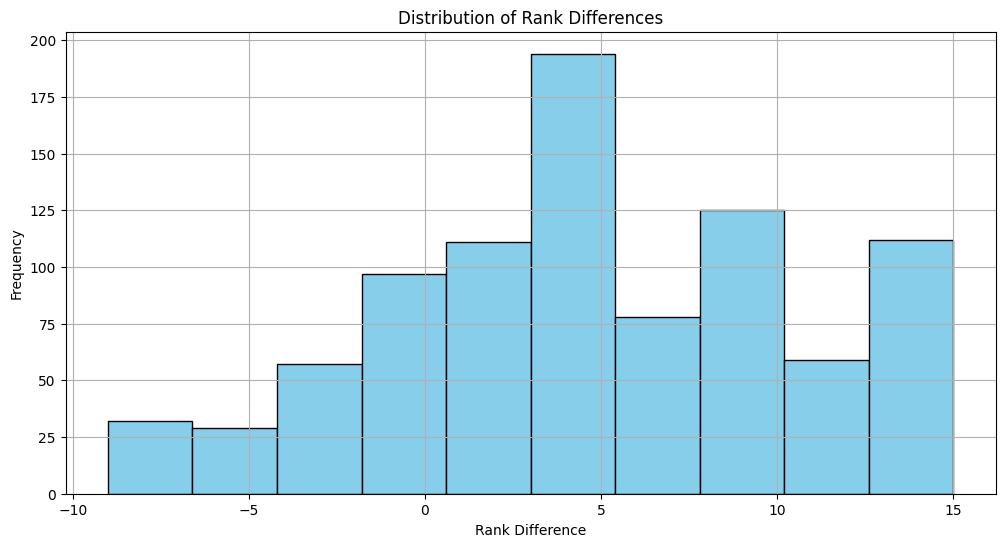

In [14]:
# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.hist(df_merged_seeds_W['RankDiff'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Rank Differences')
plt.xlabel('Rank Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**2.3 History Tourney Compact Results**

**Men**

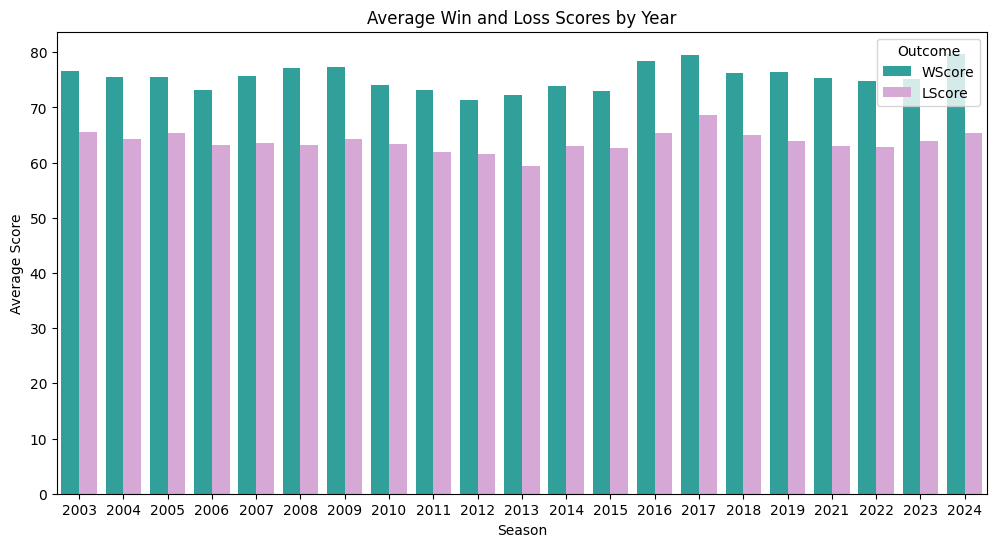

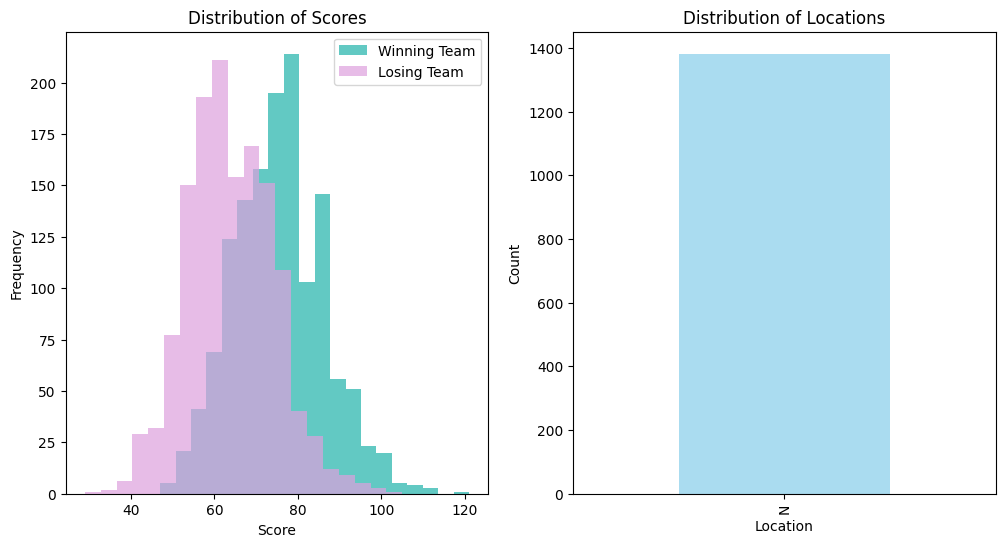

In [15]:
import seaborn as sns

# Calculate average scores for wins and losses each year
average_scores = MNCAATourneyCompactResults_2003.groupby(['Season'])[['WScore', 'LScore']].mean().reset_index()
average_scores
# Melt the DataFrame to have separate columns for win and loss scores
average_scores_melted = average_scores.melt(id_vars=['Season'], value_vars=['WScore', 'LScore'], var_name='Outcome', value_name='Average Score')
average_scores_melted

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Average Score', hue='Outcome', data=average_scores_melted, palette={'WScore': 'lightseagreen', 'LScore': 'plum'})
plt.title('Average Win and Loss Scores by Year')
plt.xlabel('Season')
plt.ylabel('Average Score')
plt.legend(title='Outcome', loc='upper right')
plt.show()


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(MNCAATourneyCompactResults_2003['WScore'], bins=20, color='lightseagreen', alpha=0.7, label='Winning Team')
plt.hist(MNCAATourneyCompactResults_2003['LScore'], bins=20, color='plum', alpha=0.7, label='Losing Team')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

# Visualize the distribution of locations
plt.subplot(1, 2, 2)
MNCAATourneyCompactResults_2003['WLoc'].value_counts().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribution of Locations')
plt.xlabel('Location')
plt.ylabel('Count')

plt.show()

**Finding**

> This historical data of team-level box scores for NCAA® men tournaments **starts with the 2003 season**.

* The 2020 NCAA Division One basketball tournament is not in the dataset, having been canceled because of the pandemic.
* A more ideal normal distribution can be seen in the past scores of the winning and losing teams.
* There is no 'A' in the 'Location', and all most all of them are 'N'. Which means we might don't need consider the effect by location.

**Women**

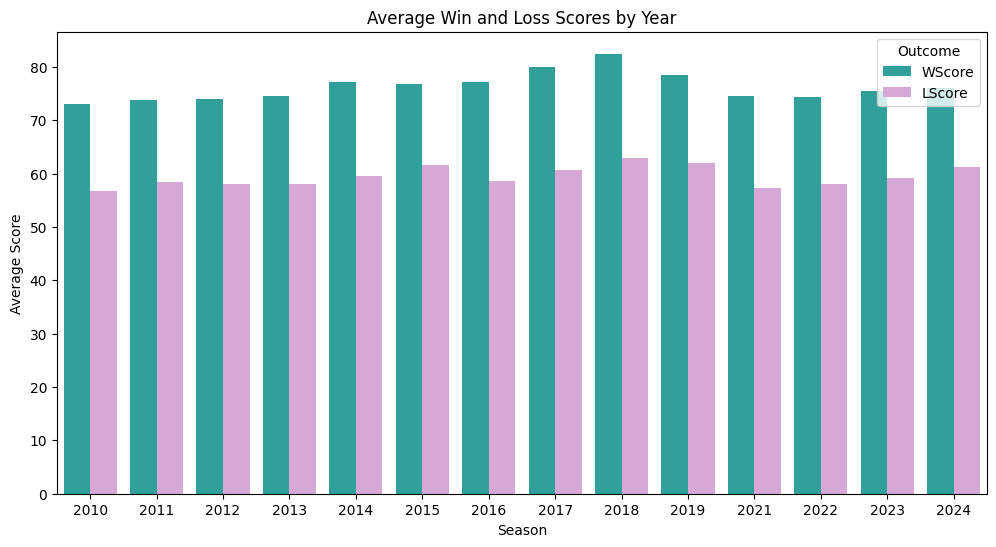

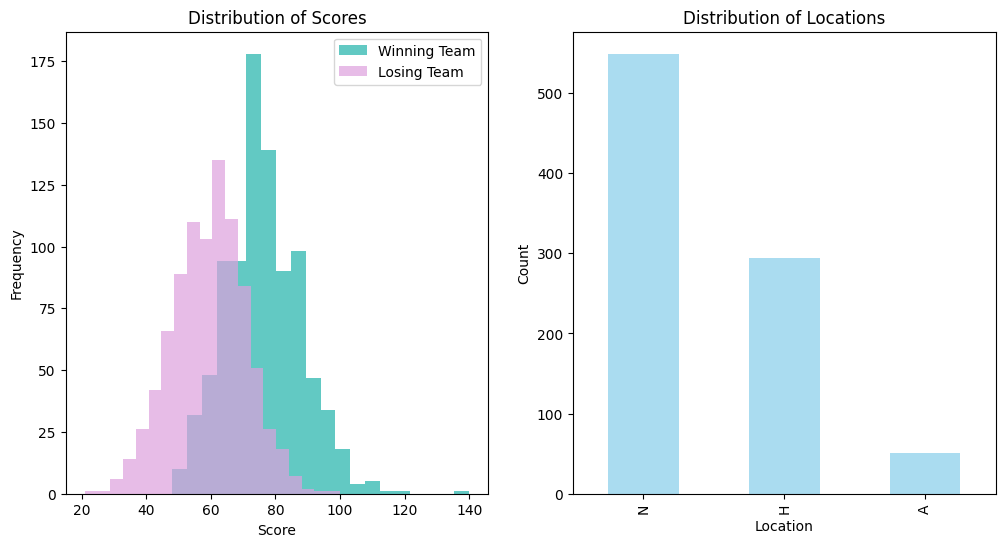

In [16]:
# Calculate average scores for wins and losses each year
average_scores = WNCAATourneyCompactResults_2010.groupby(['Season'])[['WScore', 'LScore']].mean().reset_index()
average_scores
# Melt the DataFrame to have separate columns for win and loss scores
average_scores_melted = average_scores.melt(id_vars=['Season'], value_vars=['WScore', 'LScore'], var_name='Outcome', value_name='Average Score')
average_scores_melted

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Average Score', hue='Outcome', data=average_scores_melted, palette={'WScore': 'lightseagreen', 'LScore': 'plum'})
plt.title('Average Win and Loss Scores by Year')
plt.xlabel('Season')
plt.ylabel('Average Score')
plt.legend(title='Outcome', loc='upper right')
plt.show()


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(WNCAATourneyCompactResults_2010['WScore'], bins=20, color='lightseagreen', alpha=0.7, label='Winning Team')
plt.hist(WNCAATourneyCompactResults_2010['LScore'], bins=20, color='plum', alpha=0.7, label='Losing Team')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

# Visualize the distribution of locations
plt.subplot(1, 2, 2)
WNCAATourneyCompactResults_2010['WLoc'].value_counts().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribution of Locations')
plt.xlabel('Location')
plt.ylabel('Count')

plt.show()

# 3. **Split data**: one row per game becomes two rows
> The winning and eliminated teams of the original data set are in fixed columns. The outcome of the game is unknown when predicting the game. In order to reduce the judgment bias caused by data location, each game data is split into the game data of the two teams.
Merge columns ‘WTeamID’ and ‘LTeamID’ into ‘TeamID’, and ‘WScore’ and ‘LScore’ into ‘Score’.

**Men**

In [17]:
# Split data: one row per game becomes two rows
MNCAATourneyCompactResults_teams = pd.DataFrame(columns=["Season", "DayNum", "TeamID", "Score_T", "OpposingTeamID","Score_O", "Loc", "NumOT", "Outcome"])

for index, row in MNCAATourneyCompactResults.iterrows():
    # Extract match information
    season = row["Season"]
    day_num = row["DayNum"]
    w_team_id = row["WTeamID"]
    w_score = row["WScore"]
    l_team_id = row["LTeamID"]
    l_score = row["LScore"]
    w_loc = row["WLoc"]
    num_ot = row["NumOT"]

    # Add a row of data to represent the winning match results
    winning_match_row = pd.DataFrame({
        "Season": [season],
        "DayNum": [day_num],
        "TeamID": [w_team_id],
        "Score_T": [w_score],
        "Score_O": [l_score],
        "OpposingTeamID": [l_team_id],
        "Loc": [w_loc],
        "NumOT": [num_ot],
        "Outcome": ["Win"]
    })
    MNCAATourneyCompactResults_teams = pd.concat([MNCAATourneyCompactResults_teams, winning_match_row], ignore_index=True)

    # Add a row of data to represent the result of the losing game
    losing_match_row = pd.DataFrame({
        "Season": [season],
        "DayNum": [day_num],
        "TeamID": [l_team_id],
        "Score_T": [l_score],
        "Score_O": [w_score],
        "OpposingTeamID": [w_team_id],
        "Loc": ["H" if w_loc == "A" else "A" if w_loc == "H" else "N"],
        "NumOT": [num_ot],
        "Outcome": ["Loss"]
    })
    MNCAATourneyCompactResults_teams = pd.concat([MNCAATourneyCompactResults_teams, losing_match_row], ignore_index=True)
    
MNCAATourneyCompactResults_teams


,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome
0,1985,136,1116,63,1234,54,N,0,Win
1,1985,136,1234,54,1116,63,N,0,Loss
2,1985,136,1120,59,1345,58,N,0,Win
3,1985,136,1345,58,1120,59,N,0,Loss
4,1985,136,1207,68,1250,43,N,0,Win
...,...,...,...,...,...,...,...,...,...
5031,2024,152,1104,72,1163,86,N,0,Loss
5032,2024,152,1345,63,1301,50,N,0,Win
5033,2024,152,1301,50,1345,63,N,0,Loss
5034,2024,154,1163,75,1345,60,N,0,Win


In [18]:
# Split data: one row per game becomes two rows
WNCAATourneyCompactResults_teams = pd.DataFrame(columns=["Season", "DayNum", "TeamID", "Score_T", "OpposingTeamID","Score_O", "Loc", "NumOT", "Outcome"])

for index, row in WNCAATourneyCompactResults.iterrows():
    # Extract match information
    season = row["Season"]
    day_num = row["DayNum"]
    w_team_id = row["WTeamID"]
    w_score = row["WScore"]
    l_team_id = row["LTeamID"]
    l_score = row["LScore"]
    w_loc = row["WLoc"]
    num_ot = row["NumOT"]

    # Add a row of data to represent the winning match results
    winning_match_row = pd.DataFrame({
        "Season": [season],
        "DayNum": [day_num],
        "TeamID": [w_team_id],
        "Score_T": [w_score],
        "Score_O": [l_score],
        "OpposingTeamID": [l_team_id],
        "Loc": [w_loc],
        "NumOT": [num_ot],
        "Outcome": ["Win"]
    })
    WNCAATourneyCompactResults_teams = pd.concat([WNCAATourneyCompactResults_teams, winning_match_row], ignore_index=True)

    # Add a row of data to represent the result of the losing game
    losing_match_row = pd.DataFrame({
        "Season": [season],
        "DayNum": [day_num],
        "TeamID": [l_team_id],
        "Score_T": [l_score],
        "Score_O": [w_score],
        "OpposingTeamID": [w_team_id],
        "Loc": ["H" if w_loc == "A" else "A" if w_loc == "H" else "N"],
        "NumOT": [num_ot],
        "Outcome": ["Loss"]
    })
    WNCAATourneyCompactResults_teams = pd.concat([WNCAATourneyCompactResults_teams, losing_match_row], ignore_index=True)
    
WNCAATourneyCompactResults_teams


,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome
0,1998,137,3104,94,3422,46,H,0,Win
1,1998,137,3422,46,3104,94,A,0,Loss
2,1998,137,3112,75,3365,63,H,0,Win
3,1998,137,3365,63,3112,75,A,0,Loss
4,1998,137,3163,93,3193,52,H,0,Win
...,...,...,...,...,...,...,...,...,...
3295,2024,151,3163,69,3234,71,N,0,Loss
3296,2024,151,3376,78,3301,59,N,0,Win
3297,2024,151,3301,59,3376,78,N,0,Loss
3298,2024,153,3376,87,3234,75,N,0,Win


# 4. **Seed**
**Men**

In [19]:
MNCAATourneyCompactResults_teamseed = pd.merge(MNCAATourneyCompactResults_teams, MNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','TeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'Seed_T'})
MNCAATourneyCompactResults_teamseed

MNCAATourneyCompactResults_teamseeds = pd.merge(MNCAATourneyCompactResults_teamseed, MNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','OpposingTeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'Seed_O','TeamID_x':'TeamID'})
MNCAATourneyCompactResults_teamseeds.drop(columns=['TeamID_y'], inplace=True)
MNCAATourneyCompactResults_teamseeds

MNCAATourneyCompactResults_teamseeds['Rank_T'] = MNCAATourneyCompactResults_teamseeds['Seed_T'].str[1:3].astype(int)
MNCAATourneyCompactResults_teamseeds['Rank_O'] = MNCAATourneyCompactResults_teamseeds['Seed_O'].str[1:3].astype(int)

MNCAATourneyCompactResults_teamseeds['RankDiff'] = MNCAATourneyCompactResults_teamseeds['Rank_O'] - MNCAATourneyCompactResults_teamseeds['Rank_T']
MNCAATourneyCompactResults_teamseeds['ScoreDiff'] = MNCAATourneyCompactResults_teamseeds['Score_O'] - MNCAATourneyCompactResults_teamseeds['Score_T']


MNCAATourneyCompactResults_teamseeds.head()

,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff
0,1985,136,1116,63,1234,54,N,0,Win,X09,X08,9,8,-1,-9
1,1985,136,1234,54,1116,63,N,0,Loss,X08,X09,8,9,1,9
2,1985,136,1120,59,1345,58,N,0,Win,Z11,Z06,11,6,-5,-1
3,1985,136,1345,58,1120,59,N,0,Loss,Z06,Z11,6,11,5,1
4,1985,136,1207,68,1250,43,N,0,Win,W01,W16,1,16,15,-25


In [21]:
team_ids = MNCAATourneyCompactResults_teamseeds['TeamID'].unique().tolist()
team_ids
team_info_list = []
for team_id in team_ids:
    team_data = MNCAATourneyCompactResults_teamseeds[MNCAATourneyCompactResults_teamseeds['TeamID'] == team_id].iloc[0]  
    team_info_list.append({'TeamID': team_id,
                           '1stD1Season': team_data['Season']})
team_1stD1Season_M = pd.DataFrame(team_info_list)
team_1stD1Season_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   TeamID       309 non-null    int64
 1   1stD1Season  309 non-null    int64
dtypes: int64(2)
memory usage: 5.0 KB


In [22]:
MNCAATourneyCompactResults_merge = pd.merge(MNCAATourneyCompactResults_teamseeds, team_1stD1Season_M[['TeamID','1stD1Season']], left_on=['TeamID'], right_on=['TeamID'], how='left').rename(columns={'1stD1Season':'1stD1Season_T'})
MNCAATourneyCompactResults_merge = pd.merge(MNCAATourneyCompactResults_merge, team_1stD1Season_M[['TeamID','1stD1Season']], left_on=['OpposingTeamID'], right_on=['TeamID'], how='left').rename(columns={'1stD1Season':'1stD1Season_O','TeamID_x':'TeamID'})
MNCAATourneyCompactResults_merge.drop(columns=['TeamID_y'], inplace=True)
MNCAATourneyCompactResults_merge.head()

,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff,1stD1Season_T,1stD1Season_O
0,1985,136,1116,63,1234,54,N,0,Win,X09,X08,9,8,-1,-9,1985,1985
1,1985,136,1234,54,1116,63,N,0,Loss,X08,X09,8,9,1,9,1985,1985
2,1985,136,1120,59,1345,58,N,0,Win,Z11,Z06,11,6,-5,-1,1985,1985
3,1985,136,1345,58,1120,59,N,0,Loss,Z06,Z11,6,11,5,1,1985,1985
4,1985,136,1207,68,1250,43,N,0,Win,W01,W16,1,16,15,-25,1985,1985


**Women**

In [24]:
WNCAATourneyCompactResults_teamseed = pd.merge(WNCAATourneyCompactResults_teams, WNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','TeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'Seed_T'})
WNCAATourneyCompactResults_teamseeds = pd.merge(WNCAATourneyCompactResults_teamseed, WNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','OpposingTeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'Seed_O','TeamID_x':'TeamID'})
WNCAATourneyCompactResults_teamseeds.drop(columns=['TeamID_y'], inplace=True)

WNCAATourneyCompactResults_teamseeds['Rank_T'] = WNCAATourneyCompactResults_teamseeds['Seed_T'].str[1:3].astype(int)
WNCAATourneyCompactResults_teamseeds['Rank_O'] = WNCAATourneyCompactResults_teamseeds['Seed_O'].str[1:3].astype(int)

WNCAATourneyCompactResults_teamseeds['RankDiff'] = WNCAATourneyCompactResults_teamseeds['Rank_O'] - WNCAATourneyCompactResults_teamseeds['Rank_T']
WNCAATourneyCompactResults_teamseeds['ScoreDiff'] = MNCAATourneyCompactResults_teamseeds['Score_O'] - MNCAATourneyCompactResults_teamseeds['Score_T']

WNCAATourneyCompactResults_teamseeds.head()

,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff
0,1998,137,3104,94,3422,46,H,0,Win,X02,X15,2,15,13,-9
1,1998,137,3422,46,3104,94,A,0,Loss,X15,X02,15,2,-13,9
2,1998,137,3112,75,3365,63,H,0,Win,W03,W14,3,14,11,-1
3,1998,137,3365,63,3112,75,A,0,Loss,W14,W03,14,3,-11,1
4,1998,137,3163,93,3193,52,H,0,Win,W02,W15,2,15,13,-25


In [25]:
team_ids = WNCAATourneyCompactResults_teamseeds['TeamID'].unique().tolist()
team_info_list = []
for team_id in team_ids:
    team_data = WNCAATourneyCompactResults_teamseeds[WNCAATourneyCompactResults_teamseeds['TeamID'] == team_id].iloc[0]  # 选择每个团队的第一个条目
    team_info_list.append({'TeamID': team_id,
                           '1stD1Season': team_data['Season']})
team_1stD1Season_W = pd.DataFrame(team_info_list)
WNCAATourneyCompactResults_merge = pd.merge(WNCAATourneyCompactResults_teamseeds, team_1stD1Season_W[['TeamID','1stD1Season']], left_on=['TeamID'], right_on=['TeamID'], how='left').rename(columns={'1stD1Season':'1stD1Season_T'})
WNCAATourneyCompactResults_merge = pd.merge(WNCAATourneyCompactResults_merge, team_1stD1Season_W[['TeamID','1stD1Season']], left_on=['OpposingTeamID'], right_on=['TeamID'], how='left').rename(columns={'1stD1Season':'1stD1Season_O','TeamID_x':'TeamID'})
WNCAATourneyCompactResults_merge.drop(columns=['TeamID_y'], inplace=True)
WNCAATourneyCompactResults_merge.head()

,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff,1stD1Season_T,1stD1Season_O
0,1998,137,3104,94,3422,46,H,0,Win,X02,X15,2,15,13,-9,1998,1998
1,1998,137,3422,46,3104,94,A,0,Loss,X15,X02,15,2,-13,9,1998,1998
2,1998,137,3112,75,3365,63,H,0,Win,W03,W14,3,14,11,-1,1998,1998
3,1998,137,3365,63,3112,75,A,0,Loss,W14,W03,14,3,-11,1,1998,1998
4,1998,137,3163,93,3193,52,H,0,Win,W02,W15,2,15,13,-25,1998,1998


# 5. **Choose data from 2010**
**Men**

In [26]:
MNCAATourneyCompactResults_teams = MNCAATourneyCompactResults_merge[(MNCAATourneyCompactResults_merge['Season']>=2010) & (MNCAATourneyCompactResults_merge['Season']<2024)]
MNCAATourneyCompactResults_teams.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Season          1734 non-null   object
 1   DayNum          1734 non-null   object
 2   TeamID          1734 non-null   object
 3   Score_T         1734 non-null   object
 4   OpposingTeamID  1734 non-null   object
 5   Score_O         1734 non-null   object
 6   Loc             1734 non-null   object
 7   NumOT           1734 non-null   object
 8   Outcome         1734 non-null   object
 9   Seed_T          1734 non-null   object
 10  Seed_O          1734 non-null   object
 11  Rank_T          1734 non-null   int64 
 12  Rank_O          1734 non-null   int64 
 13  RankDiff        1734 non-null   int64 
 14  ScoreDiff       1734 non-null   object
 15  1stD1Season_T   1734 non-null   int64 
 16  1stD1Season_O   1734 non-null   int64 
dtypes: int64(5), object(12)
memory usage: 230.4+ KB


**Women**

In [27]:
WNCAATourneyCompactResults_teams = WNCAATourneyCompactResults_merge[(WNCAATourneyCompactResults_merge['Season']>=2010) & (WNCAATourneyCompactResults_merge['Season']<2024)]
WNCAATourneyCompactResults_teams.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Season          1654 non-null   object
 1   DayNum          1654 non-null   object
 2   TeamID          1654 non-null   object
 3   Score_T         1654 non-null   object
 4   OpposingTeamID  1654 non-null   object
 5   Score_O         1654 non-null   object
 6   Loc             1654 non-null   object
 7   NumOT           1654 non-null   object
 8   Outcome         1654 non-null   object
 9   Seed_T          1654 non-null   object
 10  Seed_O          1654 non-null   object
 11  Rank_T          1654 non-null   int64 
 12  Rank_O          1654 non-null   int64 
 13  RankDiff        1654 non-null   int64 
 14  ScoreDiff       1654 non-null   object
 15  1stD1Season_T   1654 non-null   int64 
 16  1stD1Season_O   1654 non-null   int64 
dtypes: int64(5), object(12)
memory usage: 219.8+ KB


# 6. Location (H/A/N)

In [28]:
# Men
Mdf_Loc = MNCAATourneyCompactResults_teams.copy()
Mdf_Loc['Loc'] = Mdf_Loc['Loc'].replace({'H': 1, 'A': -1, 'N': 0})
Mdf_Loc.reset_index(drop=True).head()
# Women
Wdf_Loc = WNCAATourneyCompactResults_teams.copy()
Wdf_Loc['Loc'] = Wdf_Loc['Loc'].replace({'H': 1, 'A': -1, 'N': 0})
Wdf_Loc.reset_index(drop=True).head()

C:\Users\ravit\AppData\Local\Temp\ipykernel_9652\3353591949.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Mdf_Loc['Loc'] = Mdf_Loc['Loc'].replace({'H': 1, 'A': -1, 'N': 0})
C:\Users\ravit\AppData\Local\Temp\ipykernel_9652\3353591949.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Wdf_Loc['Loc'] = Wdf_Loc['Loc'].replace({'H': 1, 'A': -1, 'N': 0})


,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff,1stD1Season_T,1stD1Season_O
0,2010,138,3124,69,3201,55,0,0,Win,X04,X13,4,13,9,-8,2001,2008
1,2010,138,3201,55,3124,69,0,0,Loss,X13,X04,13,4,-9,8,2008,2001
2,2010,138,3173,67,3395,66,0,0,Win,X08,X09,8,9,1,-7,2010,2001
3,2010,138,3395,66,3173,67,0,0,Loss,X09,X08,9,8,-1,7,2001,2010
4,2010,138,3181,72,3214,37,1,0,Win,X02,X15,2,15,13,-3,1998,2000


# 7. Number and Rate of Winning in March Madness
**Men**

In [29]:
df_WinAccount = MNCAATourneyCompactResults_teams.copy()

# Calculate the number of wins for each Team in history March Madness dataset
win_counts = df_WinAccount[df_WinAccount['Outcome'] == 'Win']['TeamID'].value_counts()

#Create a dictionary to map TeamID to the corresponding number of wins. If there is no win, the default is 0
win_counts_dict = dict(win_counts)
for team_id in df_WinAccount['TeamID'].unique():
    if team_id not in win_counts_dict:
        win_counts_dict[team_id] = 0

# Add 'WinAccount' column
df_WinAccount['WinAccount'] = df_WinAccount['TeamID'].map(win_counts_dict)
df_WinAccount['WinAccount'] = df_WinAccount['WinAccount'].fillna(0)

# Winning Rate in March Madness
# Calculate the number of times each team has participated in the game
team_appearances = df_WinAccount['TeamID'].value_counts() 

# Add the number of attendances for each game to the raw data
df_WinAccount['CompactAccount'] = df_WinAccount['TeamID'].map(team_appearances)
# Calculate each team's winning percentage when playing in March Madness
df_WinAccount['WinningRate'] = df_WinAccount['WinAccount']/df_WinAccount['CompactAccount']
df_WinAccount = df_WinAccount[['Season','DayNum','TeamID','CompactAccount','WinAccount','WinningRate']]
df_WinAccount.reset_index(drop=True).head()

,Season,DayNum,TeamID,CompactAccount,WinAccount,WinningRate
0,2010,134,1115,2,1,0.500000
1,2010,134,1457,3,0,0.000000
2,2010,136,1124,28,19,0.678571
3,2010,136,1358,1,0,0.000000
4,2010,136,1139,23,16,0.695652


In [30]:
df_merge_M = pd.merge(Mdf_Loc,df_WinAccount[['Season','DayNum','TeamID',
                                             'CompactAccount','WinAccount','WinningRate'
                                            ]],left_on=['Season','DayNum','TeamID'],
                      right_on=['Season','DayNum','TeamID'],how='left')
df_merge_M = df_merge_M.rename(columns={'CompactAccount':'CompactAccount_T',
                                        'WinAccount':'WinAccount_T',
                                        'WinningRate':'WinningRate_T',
                                        'OpposingTeamID':'TeamID_O'
                                       })
df_merge_M = pd.merge(df_merge_M,df_WinAccount[['Season','DayNum','TeamID',
                                             'CompactAccount','WinAccount','WinningRate'
                                            ]],left_on=['Season','DayNum','TeamID_O'],
                      right_on=['Season','DayNum','TeamID'],how='left')
df_merge_M.drop(columns=['TeamID_y'], inplace=True)
df_merge_M = df_merge_M.rename(columns={'CompactAccount':'CompactAccount_O',
                                        'WinAccount':'WinAccount_O',
                                        'WinningRate':'WinningRate_O',
                                        'TeamID_x':'TeamID_T'
                                       })

df_merge_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            1734 non-null   object 
 1   DayNum            1734 non-null   object 
 2   TeamID_T          1734 non-null   object 
 3   Score_T           1734 non-null   object 
 4   TeamID_O          1734 non-null   object 
 5   Score_O           1734 non-null   object 
 6   Loc               1734 non-null   int64  
 7   NumOT             1734 non-null   object 
 8   Outcome           1734 non-null   object 
 9   Seed_T            1734 non-null   object 
 10  Seed_O            1734 non-null   object 
 11  Rank_T            1734 non-null   int64  
 12  Rank_O            1734 non-null   int64  
 13  RankDiff          1734 non-null   int64  
 14  ScoreDiff         1734 non-null   object 
 15  1stD1Season_T     1734 non-null   int64  
 16  1stD1Season_O     1734 non-null   int64  


**Women**

In [31]:
Wdf_WinAccount = WNCAATourneyCompactResults_teams.copy()

# Calculate the number of wins for each Team in history March Madness dataset
Wwin_counts = Wdf_WinAccount[Wdf_WinAccount['Outcome'] == 'Win']['TeamID'].value_counts()

#Create a dictionary to map TeamID to the corresponding number of wins. If there is no win, the default is 0
win_counts_dict = dict(Wwin_counts)
for team_id in Wdf_WinAccount['TeamID'].unique():
    if team_id not in win_counts_dict:
        win_counts_dict[team_id] = 0

# Add 'WinAccount' column
Wdf_WinAccount['WinAccount'] = Wdf_WinAccount['TeamID'].map(win_counts_dict)
Wdf_WinAccount['WinAccount'] = Wdf_WinAccount['WinAccount'].fillna(0)

# Winning Rate in March Madness
# Calculate the number of times each team has participated in the game
Wteam_appearances = Wdf_WinAccount['TeamID'].value_counts() 

# Add the number of attendances for each game to the raw data
Wdf_WinAccount['CompactAccount'] = Wdf_WinAccount['TeamID'].map(Wteam_appearances)
# Calculate each team's winning percentage when playing in March Madness
Wdf_WinAccount['WinningRate'] = Wdf_WinAccount['WinAccount']/Wdf_WinAccount['CompactAccount']
Wdf_WinAccount = Wdf_WinAccount[['Season','DayNum','TeamID','CompactAccount','WinAccount','WinningRate']]
Wdf_WinAccount.reset_index(drop=True).head()

,Season,DayNum,TeamID,CompactAccount,WinAccount,WinningRate
0,2010,138,3124,51,40,0.784314
1,2010,138,3201,5,0,0.000000
2,2010,138,3173,15,6,0.400000
3,2010,138,3395,1,0,0.000000
4,2010,138,3181,28,19,0.678571


In [32]:
df_merge_W = pd.merge(Wdf_Loc,Wdf_WinAccount[['Season','DayNum','TeamID',
                                             'CompactAccount','WinAccount','WinningRate'
                                            ]],left_on=['Season','DayNum','TeamID'],
                      right_on=['Season','DayNum','TeamID'],how='left')
df_merge_W = df_merge_W.rename(columns={'CompactAccount':'CompactAccount_T',
                                        'WinAccount':'WinAccount_T',
                                        'WinningRate':'WinningRate_T',
                                        'OpposingTeamID':'TeamID_O'
                                       })
df_merge_W = pd.merge(df_merge_W,Wdf_WinAccount[['Season','DayNum','TeamID',
                                             'CompactAccount','WinAccount','WinningRate'
                                            ]],left_on=['Season','DayNum','TeamID_O'],
                      right_on=['Season','DayNum','TeamID'],how='left')
df_merge_W.drop(columns=['TeamID_y'], inplace=True)
df_merge_W = df_merge_W.rename(columns={'CompactAccount':'CompactAccount_O',
                                        'WinAccount':'WinAccount_O',
                                        'WinningRate':'WinningRate_O',
                                        'TeamID_x':'TeamID_T'
                                       })

df_merge_W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            1654 non-null   object 
 1   DayNum            1654 non-null   object 
 2   TeamID_T          1654 non-null   object 
 3   Score_T           1654 non-null   object 
 4   TeamID_O          1654 non-null   object 
 5   Score_O           1654 non-null   object 
 6   Loc               1654 non-null   int64  
 7   NumOT             1654 non-null   object 
 8   Outcome           1654 non-null   object 
 9   Seed_T            1654 non-null   object 
 10  Seed_O            1654 non-null   object 
 11  Rank_T            1654 non-null   int64  
 12  Rank_O            1654 non-null   int64  
 13  RankDiff          1654 non-null   int64  
 14  ScoreDiff         1654 non-null   object 
 15  1stD1Season_T     1654 non-null   int64  
 16  1stD1Season_O     1654 non-null   int64  


# 8. Organize input data and format
**Men**

In [33]:
df_WandL_M = df_merge_M.copy()
df_WandL_M['Outcome'] = df_merge_M['Outcome'].map({'Win': 1, 'Loss': 0})
df_WandL_M.head()
features_M = ['Season',  'TeamID_T', 'TeamID_O', 
               'Rank_T', 'Rank_O', '1stD1Season_T','1stD1Season_O',
              'CompactAccount_T', 'WinAccount_T', 'WinningRate_T',
               'CompactAccount_O', 'WinAccount_O', 'WinningRate_O']
# Select target variable
Target_M = 'Outcome'
df_data_M = df_WandL_M[features_M + [Target_M]]
df_data_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            1734 non-null   object 
 1   TeamID_T          1734 non-null   object 
 2   TeamID_O          1734 non-null   object 
 3   Rank_T            1734 non-null   int64  
 4   Rank_O            1734 non-null   int64  
 5   1stD1Season_T     1734 non-null   int64  
 6   1stD1Season_O     1734 non-null   int64  
 7   CompactAccount_T  1734 non-null   int64  
 8   WinAccount_T      1734 non-null   int64  
 9   WinningRate_T     1734 non-null   float64
 10  CompactAccount_O  1734 non-null   int64  
 11  WinAccount_O      1734 non-null   int64  
 12  WinningRate_O     1734 non-null   float64
 13  Outcome           1734 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 189.8+ KB


**Women**

In [34]:
Wdf_WandL = df_merge_W.copy()
Wdf_WandL['Outcome'] = df_merge_W['Outcome'].map({'Win': 1, 'Loss': 0})
Wdf_WandL
# Select and prepare features
features_W = ['Season',  'TeamID_T', 'TeamID_O', 
               'Rank_T', 'Rank_O', '1stD1Season_T','1stD1Season_O',
              'CompactAccount_T', 'WinAccount_T', 'WinningRate_T',
               'CompactAccount_O', 'WinAccount_O', 'WinningRate_O']
# Select target variable
Target_W = 'Outcome'
df_data_W = Wdf_WandL[features_W + [Target_W]]
df_data_W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            1654 non-null   object 
 1   TeamID_T          1654 non-null   object 
 2   TeamID_O          1654 non-null   object 
 3   Rank_T            1654 non-null   int64  
 4   Rank_O            1654 non-null   int64  
 5   1stD1Season_T     1654 non-null   int64  
 6   1stD1Season_O     1654 non-null   int64  
 7   CompactAccount_T  1654 non-null   int64  
 8   WinAccount_T      1654 non-null   int64  
 9   WinningRate_T     1654 non-null   float64
 10  CompactAccount_O  1654 non-null   int64  
 11  WinAccount_O      1654 non-null   int64  
 12  WinningRate_O     1654 non-null   float64
 13  Outcome           1654 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 181.0+ KB


# 9. Divide training set, validation set and test set
**Men**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training, validation, and testing sets
train_data = df_data_M[( df_data_M['Season'] <= 2020)]
val_data = df_data_M[(df_data_M['Season'] > 2020) & (df_data_M['Season'] <= 2023)]
# df_test = df_data_M[df_data_M['Season'] == 2023]

# Reset indices after splitting
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
# df_test.reset_index(drop=True, inplace=True)

# Separate into features (X) and target variable (y) for each set
X_train_df = train_data[features_M]
y_train_df = train_data[Target_M]

X_val_df = val_data[features_M]
y_val_df = val_data[Target_M]

# Display the shapes of the datasets
print("Training set shape:", X_train_df.shape)
print("Validation set shape:", X_val_df.shape)

Training set shape: (1334, 13)
Validation set shape: (400, 13)


**Women**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training, validation, and testing sets
Wtrain_data = df_data_W[( df_data_W['Season'] <= 2020)]
Wval_data = df_data_W[(df_data_W['Season'] > 2020) & (df_data_W['Season'] <= 2023)]
# Wdf_test = df_data_W[df_data_W['Season'] == 2023]

# Reset indices after splitting
Wtrain_data.reset_index(drop=True, inplace=True)
Wval_data.reset_index(drop=True, inplace=True)
# Wdf_test.reset_index(drop=True, inplace=True)

# Separate into features (X) and target variable (y) for each set
X_train_Wdf = Wtrain_data[features_W]
y_train_Wdf = Wtrain_data[Target_W]

X_val_Wdf = Wval_data[features_W]
y_val_Wdf = Wval_data[Target_W]

# Display the shapes of the datasets
print("Training set shape:", X_train_Wdf.shape)
print("Validation set shape:", X_val_Wdf.shape)

Training set shape: (1260, 13)
Validation set shape: (394, 13)


# 10. Standardize features
**Men**

In [37]:
# Standardize features using Z-score normalization
scaler = StandardScaler()

# Fit the scaler on the training set
X_train_standardized = scaler.fit_transform(X_train_df)

# Transform the validation and test sets using the same scaler
X_val_standardized = scaler.transform(X_val_df)

# Add the target variable back to the DataFrames
train_data_standardized = pd.DataFrame(X_train_standardized, columns=X_train_df.columns)
train_data_standardized['Outcome'] = y_train_df

val_data_standardized = pd.DataFrame(X_val_standardized, columns=X_val_df.columns)
val_data_standardized['Outcome'] = y_val_df

train_data_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            1334 non-null   float64
 1   TeamID_T          1334 non-null   float64
 2   TeamID_O          1334 non-null   float64
 3   Rank_T            1334 non-null   float64
 4   Rank_O            1334 non-null   float64
 5   1stD1Season_T     1334 non-null   float64
 6   1stD1Season_O     1334 non-null   float64
 7   CompactAccount_T  1334 non-null   float64
 8   WinAccount_T      1334 non-null   float64
 9   WinningRate_T     1334 non-null   float64
 10  CompactAccount_O  1334 non-null   float64
 11  WinAccount_O      1334 non-null   float64
 12  WinningRate_O     1334 non-null   float64
 13  Outcome           1334 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 146.0 KB


**Women**

In [38]:
# Standardize features using Z-score normalization
scaler = StandardScaler()

# Fit the scaler on the training set
X_train_standardized_W = scaler.fit_transform(X_train_Wdf)

# Transform the validation and test sets using the same scaler
X_val_standardized_W = scaler.transform(X_val_Wdf)

# Add the target variable back to the DataFrames
train_data_standardized_W = pd.DataFrame(X_train_standardized_W, columns=X_train_Wdf.columns)
train_data_standardized_W['Outcome'] = y_train_Wdf

val_data_standardized_W = pd.DataFrame(X_val_standardized_W, columns=X_val_Wdf.columns)
val_data_standardized_W['Outcome'] = y_val_Wdf

train_data_standardized_W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            1260 non-null   float64
 1   TeamID_T          1260 non-null   float64
 2   TeamID_O          1260 non-null   float64
 3   Rank_T            1260 non-null   float64
 4   Rank_O            1260 non-null   float64
 5   1stD1Season_T     1260 non-null   float64
 6   1stD1Season_O     1260 non-null   float64
 7   CompactAccount_T  1260 non-null   float64
 8   WinAccount_T      1260 non-null   float64
 9   WinningRate_T     1260 non-null   float64
 10  CompactAccount_O  1260 non-null   float64
 11  WinAccount_O      1260 non-null   float64
 12  WinningRate_O     1260 non-null   float64
 13  Outcome           1260 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 137.9 KB


# 11. Correlation Heatmap
**Men**

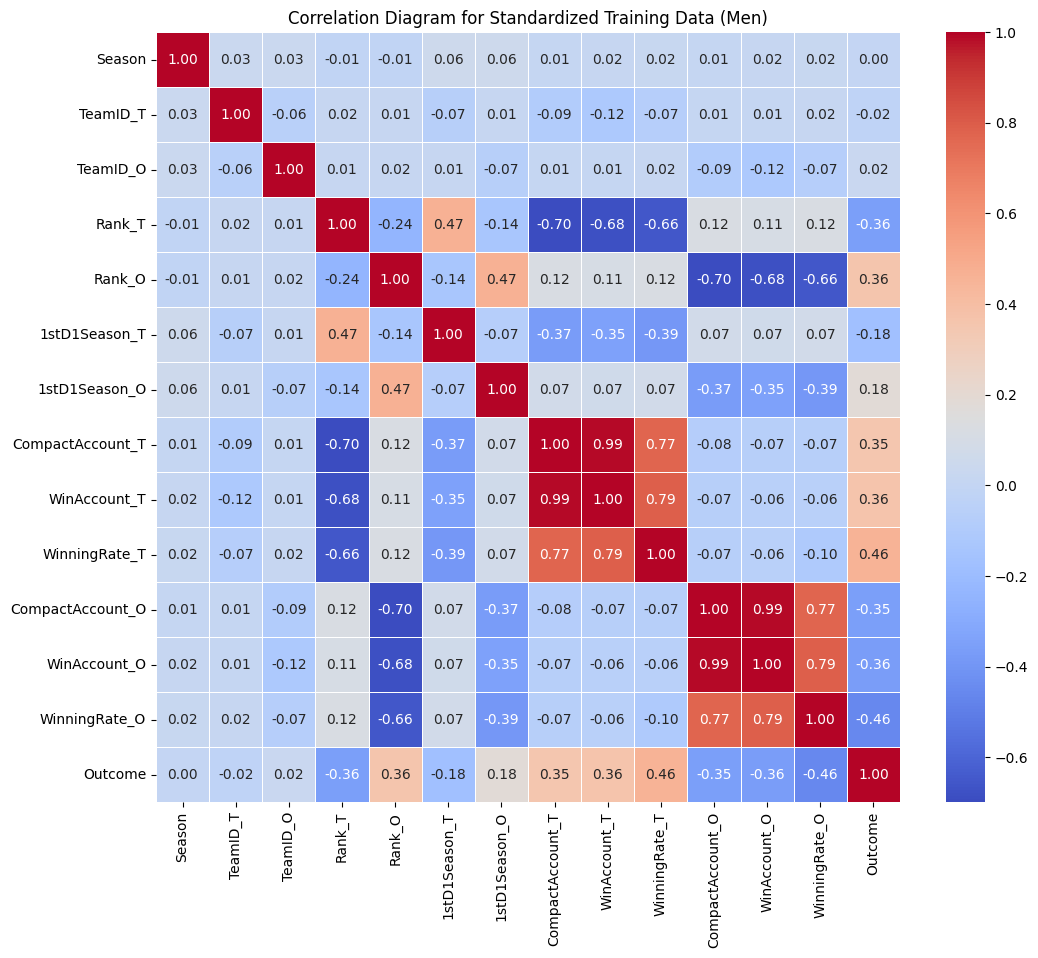

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train_data_standardized.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Diagram for Standardized Training Data (Men)')
plt.show()

**Women**

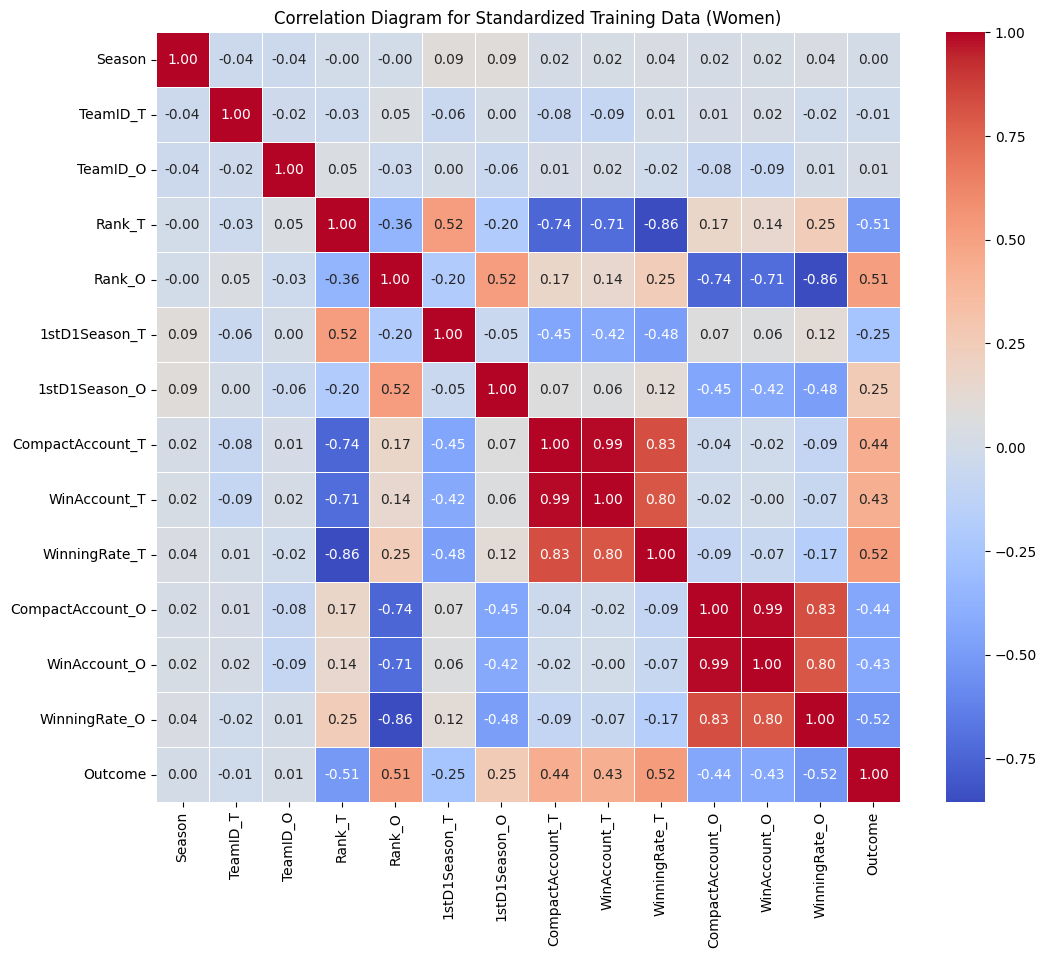

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train_data_standardized_W.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Diagram for Standardized Training Data (Women)')
plt.show()

# 12. Build and Train Model
**Men**

In [41]:
# Create input sequence
X_train = train_data_standardized[features_M].values
X_val = val_data_standardized[features_M].values

# Create target sequence
y_train = train_data_standardized[Target_M].values
y_val = val_data_standardized[Target_M].values
# y_test = test_data_standardized[Target].values

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape input sequences for compatibility with LSTM layer
# X_train_3D = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_val_3D = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_train_3D = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_3D = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

X_train_3D.shape

# Create an RNN model
model_M = Sequential()

# Add the first LSTM layer with input_shape
model_M.add(LSTM(units=50, activation='sigmoid', input_shape=(X_train_3D.shape[1], X_train_3D.shape[2])))

# Add the output Dense layer
model_M.add(Dense(units=1))

# Compile the model
model_M.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_M.fit(X_train_3D, y_train, epochs=10, batch_size=16, validation_data=(X_val_3D, y_val))


Epoch 1/10


c:\Users\ravit\Desktop\kaggle\mmnacc\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3367 - val_loss: 0.1791
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1669 - val_loss: 0.1703
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1631 - val_loss: 0.1670
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1616 - val_loss: 0.1641
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1574 - val_loss: 0.1643
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1631 - val_loss: 0.1622
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1560 - val_loss: 0.1621
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1493 - val_loss: 0.1617
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1470 - val_loss: 0.1624
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1523 - val_loss: 0.1616


**Women**

In [42]:
# Create input sequence
X_train_W = train_data_standardized_W[features_W].values
X_val_W = val_data_standardized_W[features_W].values

# Create target sequence
y_train_W = train_data_standardized_W[Target_W].values
y_val_W = val_data_standardized_W[Target_W].values
# y_test = test_data_standardized[Target].values

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape input sequences for compatibility with LSTM layer
# X_train_3D_W = X_train_W.reshape((X_train_W.shape[0], X_train_W.shape[1], 1))
# X_val_3D_W = X_val_W.reshape((X_val_W.shape[0], X_val_W.shape[1], 1))
X_train_3D_W = X_train_W.reshape((X_train_W.shape[0], 1, X_train_W.shape[1]))
X_val_3D_W = X_val_W.reshape((X_val_W.shape[0], 1, X_val_W.shape[1]))
X_train_3D_W.shape

# Create an RNN model
model_W = Sequential()

# Add the first LSTM layer with input_shape
model_W.add(LSTM(units=50, activation='sigmoid', input_shape=(X_train_3D.shape[1], X_train_3D.shape[2])))

# Add the output Dense layer
model_W.add(Dense(units=1))

# Compile the model
model_W.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_W.fit(X_train_3D_W, y_train_W, epochs=10, batch_size=16, validation_data=(X_val_3D_W, y_val_W))


Epoch 1/10


c:\Users\ravit\Desktop\kaggle\mmnacc\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2309 - val_loss: 0.1559
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1389 - val_loss: 0.1529
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1381 - val_loss: 0.1523
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1346 - val_loss: 0.1495
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1324 - val_loss: 0.1488
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1325 - val_loss: 0.1498
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1305 - val_loss: 0.1463
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1295 - val_loss: 0.1456
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1276 - val_loss: 0.1462
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1316 - val_loss: 0.1470


# 13. Predict by Model

In [43]:
def get_team_info(team_id):
    teaminfo = Team_combine[Team_combine['TeamID']==team_id].iloc[0]
    df_return = teaminfo[['TeamID','SeedRank','1stD1Season','WinAccount','CompactAccount','WinningRate']]
    return df_return

In [44]:
def input_data(team1_id, team2_id):

    team1_info = get_team_info(team1_id)
    team2_info = get_team_info(team2_id)
    team1_info_df = pd.DataFrame(team1_info).transpose()
    team2_info_df = pd.DataFrame(team2_info).transpose()
    merged_df = pd.concat([team1_info_df, team2_info_df])
    merged_df
    
    Inpu_data_M = pd.DataFrame()
    Inpu_data_M['TeamID_T'] = [team1_id] * 2  
    Inpu_data_M['TeamID_O'] = [team2_id] * 2 
    Inpu_data_M.loc[1, ['TeamID_T', 'TeamID_O']] = Inpu_data_M.loc[1, ['TeamID_O', 'TeamID_T']].values

    Inpu_data_M = pd.merge(Inpu_data_M, merged_df[['TeamID','SeedRank','1stD1Season','WinAccount',
                                                     'CompactAccount','WinningRate'
                                                   ]], left_on='TeamID_T', right_on='TeamID', how='left')
    Inpu_data_M = Inpu_data_M.rename(columns={"SeedRank":"Rank_T",
                                            '1stD1Season':'1stD1Season_T',
                                          'WinAccount':'WinAccount_T',
                                          'CompactAccount':'CompactAccount_T',
                                          'WinningRate':'WinningRate_T'})
    Inpu_data_M['Season'] = 2024
    Inpu_data_M = pd.merge(Inpu_data_M, merged_df[['TeamID','SeedRank','1stD1Season','WinAccount',
                                                     'CompactAccount','WinningRate'
                                                   ]], left_on='TeamID_O', right_on='TeamID', how='left')
    Inpu_data_M = Inpu_data_M.rename(columns={"SeedRank":"Rank_O",
                                            '1stD1Season':'1stD1Season_O',
                                          'WinAccount':'WinAccount_O',
                                          'CompactAccount':'CompactAccount_O',
                                          'WinningRate':'WinningRate_O'})
    Inpu_data_M = Inpu_data_M.drop(['TeamID_x','TeamID_y'], axis=1)
    return Inpu_data_M 

In [45]:
def predict_match_result(model, team1_id, team2_id):
    from sklearn.preprocessing import StandardScaler

    # Initialize an empty DataFrame to store results
    all_results = pd.DataFrame()

    # Initialize the scaler outside the loop
    scaler_predict = StandardScaler()
    Input_data = input_data(team1_id, team2_id)

    features_to_scale = ['Season','TeamID_T', 'Rank_T', '1stD1Season_T', 'WinAccount_T',
                         'CompactAccount_T', 'WinningRate_T', 'TeamID_O', 'Rank_O',
                         '1stD1Season_O', 'WinAccount_O', 'CompactAccount_O', 'WinningRate_O']

    # Fit the scaler on the original training data
    round_data = Input_data[features_to_scale]

    all_predictions = []

    for i in range(round_data.shape[0]):
        current_round_data = round_data.iloc[i:i+1].values
        current_round_data = np.array(current_round_data, dtype=np.float32)
        X_round = np.expand_dims(current_round_data, axis=0)

        predicted_score_difference = model.predict(X_round)
        all_predictions.append(predicted_score_difference[0][0])

    all_results = Input_data.copy()
    all_results['Pred_ScoreDiff'] = all_predictions
#     print(Input_data)

    # Initialize the new column with 0 for predicted result
    all_results['Pred_Result'] = 0
#     all_results
    # Compare 'Predicted_ScoreDifference' for each pair of rows
    for i in range(0, len(all_results), 2):
        if all_results.iloc[i]['Pred_ScoreDiff'] > all_results.iloc[i + 1]['Pred_ScoreDiff']:
            all_results.at[all_results.index[i], 'Pred_Result'] = 1
        else:
            all_results.at[all_results.index[i + 1], 'Pred_Result'] = 1

    return all_results[all_results['Pred_Result']==1]['TeamID_T']


In [46]:
def simulate_tournament(Model,teams_df):
    rounds = ['1st', '2nd', '3rd', '4th', '5th', 'Final']
    regions = ['W', 'X', 'Y', 'Z']
    
    winners_df = pd.DataFrame(columns=['Round', 'Region', 'Match', 'Winner', 'Seed'])

    for round_num, round_name in enumerate(rounds, start=1):
        print(f"{round_name} Round:")
        
        if round_num == 1:
            for region in regions:
                region_teams = teams_df[teams_df['Region'] == region].copy()
                matches = []
                matches.extend([(i, 17 - i) for i in range(1, 9)])
                for match_num, (seed1, seed2) in enumerate(matches, start=1):
                    team1 = teams_df[(teams_df['SeedRank'] == seed1)&(teams_df['Region'] == region)]['TeamID'].values[0]
                    team2 = teams_df[(teams_df['SeedRank'] == seed2)&(teams_df['Region'] == region)]['TeamID'].values[0]
                    winner = predict_match_result(Model, team1, team2).values[0]
                    winner = int(winner)
                    winner_seed = seed1 if winner == team1 else seed2

                    slot_num = seed1 if seed1 < seed2 else seed2

                    winners_df = pd.concat([winners_df, pd.DataFrame({'Round': [round_num], 'Region': [region], 'Match': [f"Match {match_num}"], 'Winner': [winner], 'Seed': [winner_seed],'SlotNum':[slot_num]})], ignore_index=True)
#                     print(f"{region} Match {match_num}: {seed1} vs {seed2} - Winner: {winner}, Seed: {winner_seed}")
#             print(winners_df)

        elif round_num == 2:
            for region in regions:
                region_winners = winners_df[winners_df['Region'] == region].copy()
                matches = []
                matches.extend([(region_winners.iloc[i]['Seed'], region_winners.iloc[7-i]['Seed']) for i in range(4)])
                for match_num, (seed1, seed2) in enumerate(matches, start=1):
                    team1 = winners_df[(winners_df['Seed'] == seed1)&(winners_df['Region'] == region)]['Winner'].values[0]
                    team2 = winners_df[(winners_df['Seed'] == seed2)&(winners_df['Region'] == region)]['Winner'].values[0]
                    winner = predict_match_result(Model, team1, team2).values[0]
                    winner = int(winner)
#                     winner_seed = seed1 if winner.values[0] == team1.values[0] else seed2
                    winner_seed = seed1 if winner == team1 else seed2
    
                    slot_num1 = winners_df[(winners_df['Round']==1)&(winners_df['Winner']==team1)]['SlotNum'].values[0]
                    slot_num2 = winners_df[(winners_df['Round']==1)&(winners_df['Winner']==team2)]['SlotNum'].values[0]
                    
                    slot_num_r2 = slot_num1 if slot_num1 < slot_num2 else slot_num2
        
                    winners_df = pd.concat([winners_df, pd.DataFrame({'Round': [round_num], 'Region': [region], 'Match': [f"Match {match_num}"], 'Winner': [winner], 'Seed': [winner_seed],'SlotNum':[slot_num_r2]})], ignore_index=True)
#                     print(f"{region} Match {match_num}: {seed1} vs {seed2} - Winner: {winner}, Seed: {winner_seed}")
#             print(winners_df)
                
        elif round_num == 3:
            for region in regions:
                previous_round_winners = winners_df[(winners_df['Region']==region)&(winners_df['Round']==2)].copy()
#                 print(previous_round_winners)
                matches = []
                matches.extend([(previous_round_winners.iloc[i]['Seed'], previous_round_winners.iloc[3-i]['Seed']) for i in range(2)])
                for match_num, (seed1, seed2) in enumerate(matches, start=1):
                    team1 = winners_df[(winners_df['Seed'] == seed1)&(winners_df['Region'] == region)]['Winner'].values[0]
                    team2 = winners_df[(winners_df['Seed'] == seed2)&(winners_df['Region'] == region)]['Winner'].values[0]
                    winner = predict_match_result(Model, team1, team2).values[0]
                    winner = int(winner)
                    winner_seed = seed1 if winner == team1 else seed2
                    
                    slot_num1 = winners_df[(winners_df['Round']==2)&(winners_df['Winner']==team1)]['SlotNum'].values[0]
                    slot_num2 = winners_df[(winners_df['Round']==2)&(winners_df['Winner']==team2)]['SlotNum'].values[0]
                    
                    slot_num_r3 = slot_num1 if slot_num1 < slot_num2 else slot_num2
                    
                    winners_df = pd.concat([winners_df, pd.DataFrame({'Round': [round_num], 'Region': [region], 'Match': [f"Match {match_num}"], 'Winner': [winner], 'Seed': [winner_seed],'SlotNum':[slot_num_r3]})], ignore_index=True)
#                     print(f"{region} Match {match_num}: {seed1} vs {seed2} - Winner: {winner}, Seed: {winner_seed}")
# #             print(winners_df)

        elif round_num == 4:
            for region in regions:
                previous_round_winners = winners_df[(winners_df['Region']==region)&(winners_df['Round']==3)].copy()
                matches = []
                matches.extend([(previous_round_winners.iloc[i]['Seed'], previous_round_winners.iloc[1-i]['Seed']) for i in range(1)])
#                 print(matches)
                for match_num, (seed1, seed2) in enumerate(matches, start=1):
                    team1 = previous_round_winners[(previous_round_winners['Seed'] == seed1)&(previous_round_winners['Region'] == region)]['Winner'].values[0]
                    team2 = previous_round_winners[(previous_round_winners['Seed'] == seed2)&(previous_round_winners['Region'] == region)]['Winner'].values[0]
                    winner = predict_match_result(Model, team1, team2).values[0]
                    winner = int(winner)
                    winner_seed = seed1 if winner == team1 else seed2
                    
                    slot_num1 = winners_df[(winners_df['Round']==3)&(winners_df['Winner']==team1)]['SlotNum'].values[0]
                    slot_num2 = winners_df[(winners_df['Round']==3)&(winners_df['Winner']==team2)]['SlotNum'].values[0]
                    
                    slot_num_r4 = slot_num1 if slot_num1 < slot_num2 else slot_num2
                    
                    winners_df = pd.concat([winners_df, pd.DataFrame({'Round': [round_num], 'Region': [region], 'Match': [f"Match {match_num}"], 'Winner': [winner], 'Seed': [winner_seed],'SlotNum':[slot_num_r4]})], ignore_index=True)
#                     print(f"{region} Match {match_num}: {seed1} vs {seed2} - Winner: {winner}, Seed: {winner_seed}")
#             print(winners_df)
                
        elif round_num == 5:
            previous_round_winners = winners_df[(winners_df['Round']==4)]
            W_winner = previous_round_winners[ (previous_round_winners['Region'] == 'W')]['Seed'].values[0]
            X_winner = previous_round_winners[ (previous_round_winners['Region'] == 'X')]['Seed'].values[0]
            Y_winner = previous_round_winners[ (previous_round_winners['Region'] == 'Y')]['Seed'].values[0]
            Z_winner = previous_round_winners[ (previous_round_winners['Region'] == 'Z')]['Seed'].values[0]
            matches = []
            matches.append((W_winner, X_winner))
            matches.append((Y_winner, Z_winner))
#             print(matches)
            i = 1
            for match_num, (seed1, seed2) in enumerate(matches, start=1):
                team1 = previous_round_winners[(previous_round_winners['Seed'] == seed1)& (previous_round_winners['Region'] == 'W')|(previous_round_winners['Region'] == 'Y')]['Winner'].values[0]
                team2 = previous_round_winners[(previous_round_winners['Seed'] == seed2)& (previous_round_winners['Region'] == 'X')|(previous_round_winners['Region'] == 'Z')]['Winner'].values[0]
                winner = predict_match_result(Model, team1, team2).values[0]
                winner = int(winner)
                winner_seed = seed1 if winner == team1 else seed2
                if i==1:
                    region='WX'
                else:
                    region='YZ'
                i += 1
                winners_df = pd.concat([winners_df, pd.DataFrame({'Round': [round_num], 'Region': [region], 'Match': [f"Match {match_num}"], 'Winner': [winner], 'Seed': [winner_seed]})], ignore_index=True)
#                 print(f"{region} Match {match_num}: {seed1} vs {seed2} - Winner: {winner}, Seed: {winner_seed}")
#             print(winners_df)            

        elif round_num == 6:
            previous_round_winners = winners_df[(winners_df['Round']==5)]
            C_winner = previous_round_winners['Winner'].values[0]
            H_winner = previous_round_winners['Winner'].values[1]
            matches = []
            matches.append((W_winner, Z_winner))
#             print(matches)
            for match_num, (seed1, seed2) in enumerate(matches, start=1):
                winner = predict_match_result(Model, team1, team2).values[0]
                winner = int(winner)
                winner_seed = seed1 if winner == team1 else seed2
                winners_df = pd.concat([winners_df, pd.DataFrame({'Round': [round_num], 'Region': 'CH', 'Match': [f"Match {match_num}"], 'Winner': [winner], 'Seed': [winner_seed]})], ignore_index=True)
#                 print(f"{region} Match {match_num}: {seed1} vs {seed2} - Winner: {winner}, Seed: {winner_seed}")
#             print("\n") 
#             print(winners_df) 

#         print("\n") 
    return winners_df


**Men**

In [47]:

team_ids = df_merge_M['TeamID_T'].unique().tolist()
team_ids

team_info_list = []
for team_id in team_ids:
    team_data = df_merge_M[df_merge_M['TeamID_T'] == team_id].iloc[0]  # 选择每个团队的第一个条目
    team_info_list.append({'TeamID': team_id,
                           '1stD1Season': team_data['Season'],
                           'WinAccount': team_data['WinAccount_T'],
                           'CompactAccount': team_data['CompactAccount_T'],
                           'WinningRate': team_data['WinningRate_T']})

team_info_M = pd.DataFrame(team_info_list)

team_info_M.head()


,TeamID,1stD1Season,WinAccount,CompactAccount,WinningRate
0,1115,2010,1,2,0.500000
1,1457,2010,0,3,0.000000
2,1124,2010,19,28,0.678571
3,1358,2010,0,1,0.000000
4,1139,2010,16,23,0.695652


In [48]:
tourney_seeds_2024_M = tourney_seeds_2024[tourney_seeds_2024['Tournament']=='M']
seeds_2024_M = tourney_seeds_2024_M.copy()
seeds_2024_M['Region'] = seeds_2024_M['Seed'].str[0]
seeds_2024_M['SeedRank'] = seeds_2024_M['Seed'].str[1:].astype(int)
seeds_2024_M

NameError: name 'tourney_seeds_2024' is not defined

In [49]:
Team_combine = pd.merge(seeds_2024_M,team_info_M[['TeamID','1stD1Season',
                                         'WinAccount','CompactAccount','WinningRate'
                                        ]], left_on=['TeamID'], right_on=['TeamID'], how='left')


teams_df_M = seeds_2024_M.copy()
winners_df_M = simulate_tournament(model_M,teams_df_M)
winners_df_M

NameError: name 'seeds_2024_M' is not defined

In [50]:
winners_df_M[31:65]

NameError: name 'winners_df_M' is not defined

**Women**

In [51]:

team_ids = df_merge_W['TeamID_T'].unique().tolist()
team_ids
team_info_list = []
for team_id in team_ids:
    team_data = df_merge_W[df_merge_W['TeamID_T'] == team_id].iloc[0]  # 选择每个团队的第一个条目
    team_info_list.append({'TeamID': team_id,
                           '1stD1Season': team_data['Season'],
                           'WinAccount': team_data['WinAccount_T'],
                           'CompactAccount': team_data['CompactAccount_T'],
                           'WinningRate': team_data['WinningRate_T']})

team_info_W = pd.DataFrame(team_info_list)
team_info_W.head()

tourney_seeds_2024_W = tourney_seeds_2024[tourney_seeds_2024['Tournament']=='W']
seeds_2024_W = tourney_seeds_2024_W.copy()
seeds_2024_W['Region'] = seeds_2024_W['Seed'].str[0]
seeds_2024_W['SeedRank'] = seeds_2024_W['Seed'].str[1:].astype(int)
seeds_2024_W.reset_index(drop=True, inplace=True)
seeds_2024_W.head()

NameError: name 'tourney_seeds_2024' is not defined

In [44]:
Team_combine = pd.merge(seeds_2024_W,team_info_W[['TeamID','1stD1Season',
                                         'WinAccount','CompactAccount','WinningRate'
                                        ]], left_on=['TeamID'], right_on=['TeamID'], how='left')

teams_df_W = seeds_2024_W.copy()
winners_df_W = simulate_tournament(model_W,teams_df_W)
winners_df_W

1st Round:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


,Round,Region,Match,Winner,Seed,SlotNum
0,1,W,Match 1,3313,16,1.0
1,1,W,Match 2,3221,15,2.0
2,1,W,Match 3,3381,14,3.0
3,1,W,Match 4,3170,13,4.0
4,1,W,Match 5,3339,12,5.0
...,...,...,...,...,...,...
58,4,Y,Match 1,3424,11,1.0
59,4,Z,Match 1,3385,11,1.0
60,5,WX,Match 1,3292,11,NaN
61,5,YZ,Match 2,3292,11,NaN


# 14. Submission

**Men**

In [45]:
seeds_2024_M

,Tournament,Seed,TeamID,Region,SeedRank
0,M,W01,1345,W,1
1,M,W02,1266,W,2
2,M,W03,1243,W,3
3,M,W04,1397,W,4
4,M,W05,1181,W,5
...,...,...,...,...,...
59,M,Z12,1433,Z,12
60,M,Z13,1233,Z,13
61,M,Z14,1213,Z,14
62,M,Z15,1421,Z,15


In [52]:
winners_info_M = pd.merge(winners_df_M,seeds_2024_M[['TeamID','Seed']],left_on=['Winner'], right_on=['TeamID'], how='left')
winners_info_M = winners_info_M.rename(columns={'Seed_x':'Rank','Seed_y':'Seed'})

winners_info_M['SlotNum'] = winners_info_M['SlotNum'].astype(str).apply(lambda x: x.rstrip('0').rstrip('.'))
winners_info_M

NameError: name 'winners_df_M' is not defined

In [47]:
def transform_to_desired_format(df):
    transformed_df = pd.DataFrame(columns=['RowId', 'Tournament', 'Bracket', 'Slot', 'Team'])
    
    for index, row in df.iterrows():
        if row['Round'] <= 4:
            slot = f'R{row["Round"]}{row["Region"]}{str(row["SlotNum"])}'
            team = f'{row["Seed"]}'
        else:
            slot = f'R{row["Round"]}{row["Region"]}'
            team = f'{row["Seed"]}'
        
        transformed_df = pd.concat([transformed_df, pd.DataFrame({
            'RowId': [index],
            'Tournament': ['M'],
            'Bracket': [1],
            'Slot': [slot],
            'Team': [team]
        })], ignore_index=True)
    
    return transformed_df

submission_M = transform_to_desired_format(winners_info_M)
submission_M[32:]

,RowId,Tournament,Bracket,Slot,Team
32,32,M,1,R2W1,W16
33,33,M,1,R2W2,W02
34,34,M,1,R2W3,W03
35,35,M,1,R2W4,W05
36,36,M,1,R2X1,X01
37,37,M,1,R2X2,X02
38,38,M,1,R2X3,X03
39,39,M,1,R2X4,X12
40,40,M,1,R2Y1,Y09
41,41,M,1,R2Y2,Y15


**Women**

In [48]:
winners_info_W = pd.merge(winners_df_W,seeds_2024_W[['TeamID','Seed']],left_on=['Winner'], right_on=['TeamID'], how='left')
winners_info_W = winners_info_W.rename(columns={'Seed_x':'Rank','Seed_y':'Seed'})
winners_info_W['SlotNum'] = winners_info_W['SlotNum'].astype(str).apply(lambda x: x.rstrip('0').rstrip('.'))

winners_info_W

,Round,Region,Match,Winner,Rank,SlotNum,TeamID,Seed
0,1,W,Match 1,3313,16,1,3313,W16
1,1,W,Match 2,3221,15,2,3221,W15
2,1,W,Match 3,3381,14,3,3381,W14
3,1,W,Match 4,3170,13,4,3170,W13
4,1,W,Match 5,3339,12,5,3339,W12
...,...,...,...,...,...,...,...,...
58,4,Y,Match 1,3424,11,1,3424,Y11
59,4,Z,Match 1,3385,11,1,3385,Z11
60,5,WX,Match 1,3292,11,nan,3292,X11
61,5,YZ,Match 2,3292,11,nan,3292,X11


In [49]:
def transform_to_desired_format(df):
    transformed_df = pd.DataFrame(columns=['RowId', 'Tournament', 'Bracket', 'Slot', 'Team'])
    
    for index, row in df.iterrows():
        if row['Round'] <= 4:
            slot = f'R{row["Round"]}{row["Region"]}{str(row["SlotNum"])}'
            team = f'{row["Seed"]}'
        else:
            slot = f'R{row["Round"]}{row["Region"]}'
            team = f'{row["Seed"]}'
        
        transformed_df = pd.concat([transformed_df, pd.DataFrame({
            'RowId': [index],
            'Tournament': ['W'],
            'Bracket': [1],
            'Slot': [slot],
            'Team': [team]
        })], ignore_index=True)
    
    return transformed_df

submission_W = transform_to_desired_format(winners_info_W)
submission_W.reset_index(drop=True, inplace=True)
submission_W[32:65]

,RowId,Tournament,Bracket,Slot,Team
32,32,W,1,R2W1,W09
33,33,W,1,R2W2,W10
34,34,W,1,R2W3,W11
35,35,W,1,R2W4,W12
36,36,W,1,R2X1,X09
37,37,W,1,R2X2,X10
38,38,W,1,R2X3,X11
39,39,W,1,R2X4,X12
40,40,W,1,R2Y1,Y09
41,41,W,1,R2Y2,Y10


In [50]:
submission = pd.concat([submission_M, submission_W], ignore_index=True)
submission['RowId'] = range(len(submission))
print(submission)

     RowId Tournament Bracket  Slot Team
0        0          M       1  R1W1  W16
1        1          M       1  R1W2  W02
2        2          M       1  R1W3  W03
3        3          M       1  R1W4  W13
4        4          M       1  R1W5  W05
..     ...        ...     ...   ...  ...
121    121          W       1  R4Y1  Y11
122    122          W       1  R4Z1  Z11
123    123          W       1  R5WX  X11
124    124          W       1  R5YZ  X11
125    125          W       1  R6CH  X11

[126 rows x 5 columns]


In [51]:
submission.to_csv('submission.csv', index=False)
